# Singular Value Decomposition

Let us start by importing two libraries, numpy and matplotlib. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, we will learn how to create matrices of any dimension that have a specified rank. To create a rank-1 matrix $A_{nxm}$, it is sufficient to define two vectors, $u_{[nx1]}$ and $v_{[mx1]}$ and find their *outer product*, $A = u \cdot v^T$.

In [2]:
# A simple rank-1 matrix of dimension 5x4
u = np.transpose([[1,1,1,1,1]])
print 'vector u:  '
print u
v = np.transpose([[1,2,3,4]])
print 'vector v:   '
print v
A = np.dot(u,np.transpose(v))
print 'matrix A:   '
print  A
print 'rank of matrix A:   '
print  np.linalg.matrix_rank(A)
print 

vector u:  
[[1]
 [1]
 [1]
 [1]
 [1]]
vector v:   
[[1]
 [2]
 [3]
 [4]]
matrix A:   
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
rank of matrix A:   
1



Another example of a matrix with rank 1:

In [3]:
# A more complicated rank-1 matrix of dimension 5x4
u = np.transpose([[1,2,3,4,5]])
print 'vector u:  '
print u
v = np.transpose([[1,2,3,4]])
print 'vector v:   '
print  v
A = np.dot(u,np.transpose(v))
print 'matrix A:   '
print A

print
print 'rank of matrix A:   '
print np.linalg.matrix_rank(A)
print 'size of A:'
print np.shape(A)
print 'type of objects u and A:'
print type(u), type(A)

vector u:  
[[1]
 [2]
 [3]
 [4]
 [5]]
vector v:   
[[1]
 [2]
 [3]
 [4]]
matrix A:   
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]
 [ 5 10 15 20]]

rank of matrix A:   
1
size of A:
(5, 4)
type of objects u and A:
<type 'numpy.ndarray'> <type 'numpy.ndarray'>


To generate a rank-2 matrix $A_{nxm}$, it is sufficient to define two pairs of vectors $(u_1,v_1)$ and $(u_2,v_2)$, where length of $u_1$ and $u_2$ is $n$ and length of $v_1$ and $v_2$ is $m$, calculate their *outer products* and add them up, $A = u_1 \cdot v_1^T + u_2 \cdot v_2^T$. 

In [4]:
# A simple rank-2 matrix of dimension 5x4
u1 = np.transpose([[1,1,1,1,1]])
u2 = np.transpose([[1,2,1,2,1]])
print 'vector u1:  '
print u1
print 'vector u2:  '
print u2
v1 = np.transpose([[1,0,2]])
v2 = np.transpose([[0,1,1]])
print 'vector v1:   '
print v1
print 'vector v2:   '
print v2
A = np.dot(u1,np.transpose(v1)) + np.dot(u2,np.transpose(v2))
print 'matrix A:   '
print  A
print 'rank of matrix A:   '
print  np.linalg.matrix_rank(A)
print 

vector u1:  
[[1]
 [1]
 [1]
 [1]
 [1]]
vector u2:  
[[1]
 [2]
 [1]
 [2]
 [1]]
vector v1:   
[[1]
 [0]
 [2]]
vector v2:   
[[0]
 [1]
 [1]]
matrix A:   
[[1 1 3]
 [1 2 4]
 [1 1 3]
 [1 2 4]
 [1 1 3]]
rank of matrix A:   
2



A more compact way to do exactly the same is to create a matrix $U$ by concatenating vectors $u_1$ and $u_2$ and matrix $V$ by concatenating vectors $v_1$ and $v_2$, as $U = [u_1 u_2]$ and $V = [v_1 v_2]$   

In [6]:
# An alternative way of creating a rank-2 matrix
U = np.concatenate((u1,u2), axis = 1)
print 'Matrix U:'
print U
V = np.concatenate((v1,v2), axis = 1)
print 'Matrix V:'
print V
A = np.dot(U,np.transpose(V))
print 'matrix A:   '
print  A
print 'rank of matrix A:   '
print  np.linalg.matrix_rank(A)
print 

Matrix U:
[[1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]]
Matrix V:
[[1 0]
 [0 1]
 [2 1]]
matrix A:   
[[1 1 3]
 [1 2 4]
 [1 1 3]
 [1 2 4]
 [1 1 3]]
rank of matrix A:   
2



Here is another way to quickly generate a large low-rank matrix. 

In [13]:
A = np.dot(np.transpose([[1,1,1,1,1],[1,2,1,2,1]]),np.random.rand(2,100))
print 'matrix A:   '
print A
print 'rank of matrix A:   '
print np.linalg.matrix_rank(A)
print 'size of A:'
print np.shape(A)

matrix A:   
[[ 1.64453168  1.47204533  0.89106707  1.70322466  1.54961605  0.88394729
   1.447786    0.8311794   1.46670532  1.3936749   0.67685724  1.52889391
   0.44506492  1.43497999  1.13229372  1.01394785  1.58146885  1.62483321
   1.39094152  0.54155178  1.08776589  0.47848711  1.08958129  0.76028891
   0.67640885  1.30726545  0.73203906  0.83663199  0.75800522  1.51407997
   1.20045644  0.34113852  0.50224793  1.67148523  0.89668203  1.30097925
   1.82598529  1.69871389  0.78800589  1.12546447  1.17878277  1.30402781
   1.20838195  0.86355703  0.71766349  0.93198717  0.65851256  0.89514907
   1.14504756  0.88060457  1.63365722  1.15179117  1.00810545  1.51551693
   1.14588155  1.35359247  0.86163805  1.30074763  0.3720462   1.27554594
   1.05312223  0.66209356  1.73172547  0.96366183  0.93081261  0.73280947
   1.55081602  0.82720145  1.13815743  1.00799444  0.79876246  0.68597476
   1.35368121  0.5659145   0.84537644  0.43698293  1.59898021  0.76294784
   1.28490509  0.42344868

The rank of a zero matrix is always zero.

In [11]:
A = np.zeros((20,4))
print 'matrix A:   '
print A
print 'rank of matrix A:' 
print np.linalg.matrix_rank(A)

matrix A:   
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
rank of matrix A:
0


Let us now load Temple T data set and draw a scatter plot. 

[[-0.49806202  0.40064976]
 [-0.49806202  0.39731642]
 [-0.49806202  0.39398309]
 ..., 
 [ 0.49806202  0.05398309]
 [ 0.49806202  0.05064976]
 [ 0.49806202  0.04731642]]
The dimensions of A are:  (28226, 2)


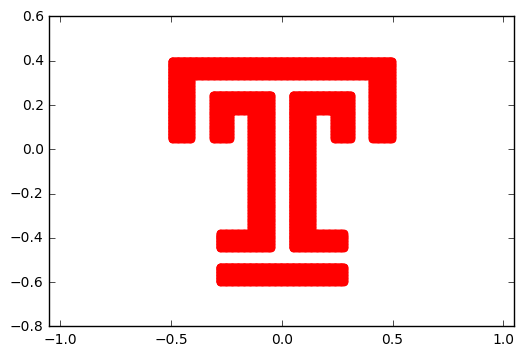

In [14]:
A = np.loadtxt('d_temple.csv', delimiter=",",dtype='float')
print A
print 'The dimensions of A are: ' , np.shape(A)
plt.scatter(A[:,0],A[:,1],color='red');
plt.axis('equal');

Let us see the effect of some transformations of A.

[[ 0.13579403  0.75978563]
 [ 0.18106274  0.12298194]]


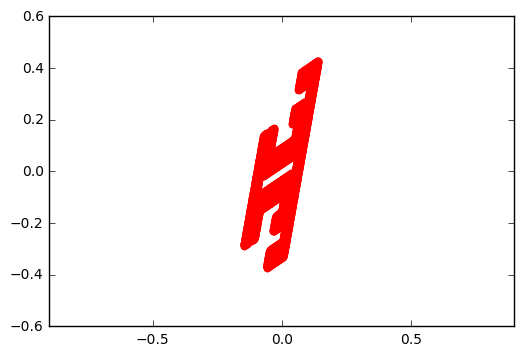

In [18]:
# Generate a random "projection" matrix
T = np.random.rand(2,2)
print T
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

[[1, 0], [0, 3]]


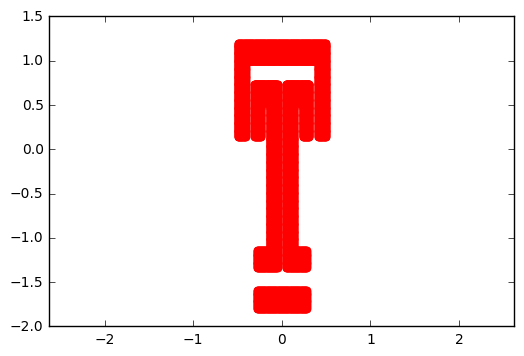

In [19]:
# Generate a "scaling" matrix
T = [[1,0],[0,3]]
print T
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

[[0.45359612142557731, 0.89120736006143542], [-0.89120736006143542, 0.45359612142557731]]


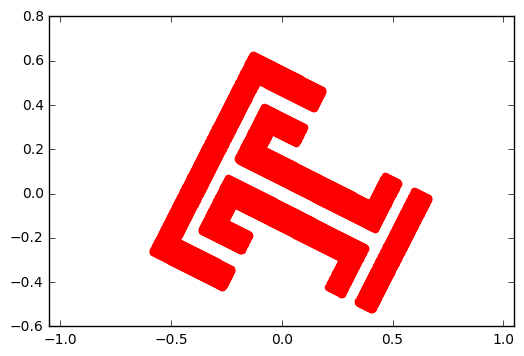

In [20]:
# Generate a "rotation" matrix
angle = 1.1
T = [[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]]
print T
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

Let us now create a rank-2 large matrix out of Temple data, which has 100 attributes (columns).

(28226, 100)
rank of matrix Abig:
2


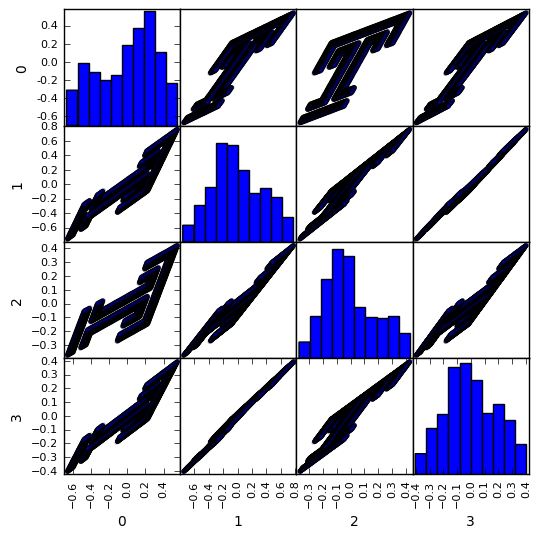

In [22]:
T = np.random.rand(2,100)
Abig = np.dot(A, T)
print np.shape(Abig)
# to plot a scatterplot of the first 4 columns... it will take a minute...
import pandas as pd 
pd.scatter_matrix(pd.DataFrame(Abig[:,1:5]), alpha=0.2, figsize=(6, 6));
print 'rank of matrix Abig:' 
print np.linalg.matrix_rank(Abig)

### Apply SVD
Let us perform SVD on matrix `Abig`.

In [23]:
# SVD
U,s,V = np.linalg.svd(Abig,full_matrices=0)
print U.shape, s.shape, V.shape
print 'the first 10 singular values:', s[0:10]

(28226, 100) (100,) (100, 100)
the first 10 singular values: [  3.65616240e+02   1.32516505e+02   1.06440572e-13   5.72351727e-14
   3.93181718e-14   3.53806847e-14   3.53806847e-14   3.53806847e-14
   3.53806847e-14   3.53806847e-14]


Let us find a rank-2 approximation of `Abig`

In [26]:
# Find rank-2 aproximation
k = 2
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print 'Norm of Abig:  ', np.linalg.norm(Abig, ord=2)
print 'First 10 singular values: ',  s[0:10]
print 'Norm of difference Abig-Ak = ', np.linalg.norm(Abig - Ak, ord=2)


Norm of Abig:   365.61624048
First 10 singular values:  [  3.65616240e+02   1.32516505e+02   1.06440572e-13   5.72351727e-14
   3.93181718e-14   3.53806847e-14   3.53806847e-14   3.53806847e-14
   3.53806847e-14   3.53806847e-14]
Norm of difference Abig-Ak =  1.39473595594e-13


Let us visualize the scatter-plot of the first two columns of `U` (the first two left singular vectors)

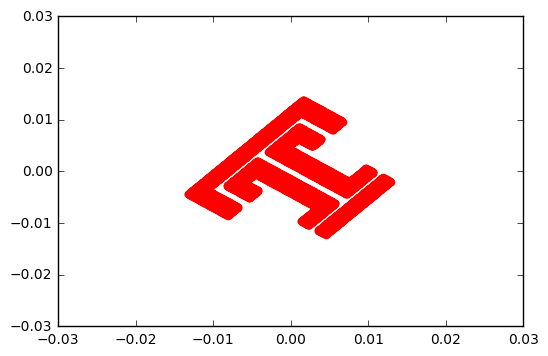

In [27]:
plt.scatter(U[:,0],U[:,1],color='red');

Perfect:  the first two columns of `U` are sufficient to reconstruct letter T!

Let us generate a noisy version of `Abig`

In [36]:
Abig_noise = Abig + np.random.randn(28226,100)*0.1 

(28226, 100) (100,) (100, 100)
the first 10 singular values: [ 365.90893671  133.7277387    17.74182565   17.64916169   17.63525886
   17.60710821   17.58690175   17.55477103   17.53850253   17.51376719]
Norm of Abig:   365.908936711
First 10 singular values:  [ 365.90893671  133.7277387    17.74182565   17.64916169   17.63525886
   17.60710821   17.58690175   17.55477103   17.53850253   17.51376719]
Norm of difference Abig-Ak =  17.7418256514


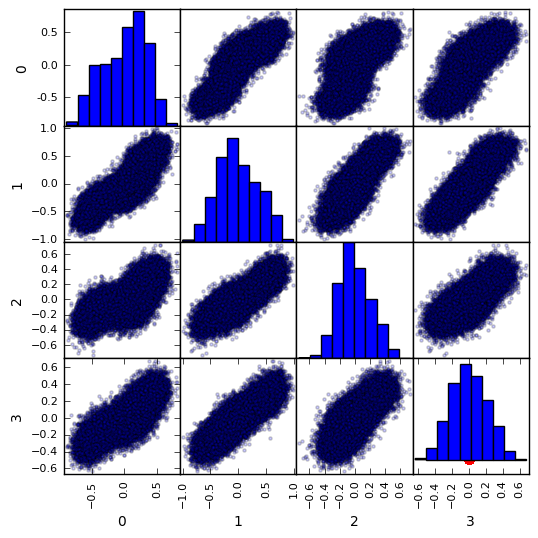

In [34]:
# SVD
U,s,V = np.linalg.svd(Abig_noise,full_matrices=0)
print U.shape, s.shape, V.shape
print 'the first 10 singular values:', s[0:10]

# Find rank-2 aproximation
k = 2
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print 'Norm of Abig:  ', np.linalg.norm(Abig_noise, ord=2)
print 'First 10 singular values: ',  s[0:10]
print 'Norm of difference Abig-Ak = ', np.linalg.norm(Abig_noise - Ak, ord=2)

pd.scatter_matrix(pd.DataFrame(Abig_noise[:,1:5]), alpha=0.2, figsize=(6, 6));


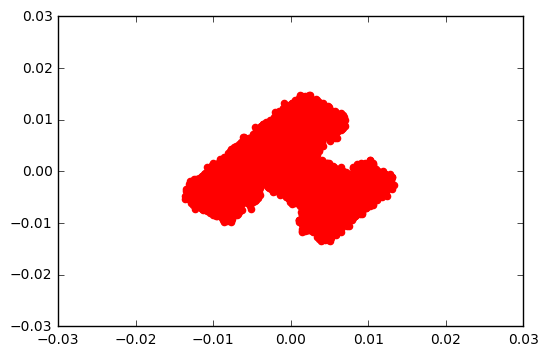

In [37]:
plt.scatter(U[:,0],U[:,1],color='red');

**Question 7**. 
- Plot the scatterplot of the first 5 columns of `Abig_noise`. Discuss what you see.
- Perform SVD on `Abig_noise`. What are the first 10 singular values?
- Find the rank-2 approximation of this `Abig_noise`. What is the norm of the difference?
- Plot the scatterplot of the first two columns of `U`. Discuss what you see and why.

## Lab 5.B: Apply SVD on real data

- comming soon...